<a href="https://colab.research.google.com/github/MadhelKathlynAnnJavillonar/CPE-031-Data-Visualizations-and-Data-Analysis/blob/main/Hands_on_Activity6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_excel('/content/drive/MyDrive/CPE 031 JAVILLONAR/SampleData.xlsx')

In [30]:
print(df)

    OrderDate   Region       Rep     Item  Units  Unit Cost    Total
0  2021-01-06     East     Jones   Pencil     95       1.99   189.05
1  2021-01-23  Central    Kivell   Binder     50      19.99   999.50
2  2021-02-09  Central   Jardine   Pencil     36       4.99   179.64
3  2021-02-26  Central      Gill      Pen     27      19.99   539.73
4  2021-03-15     West   Sorvino   Pencil     56       2.99   167.44
5  2021-04-01     East     Jones   Binder     60       4.99   299.40
6  2021-04-18  Central   Andrews   Pencil     75       1.99   149.25
7  2021-05-05  Central   Jardine   Pencil     90       4.99   449.10
8  2021-05-22     West  Thompson   Pencil     32       1.99    63.68
9  2021-06-08     East     Jones   Binder     60       8.99   539.40
10 2021-06-25  Central    Morgan   Pencil     90       4.99   449.10
11 2021-07-12     East    Howard   Binder     29       1.99    57.71
12 2021-07-29     East    Parent   Binder     81      19.99  1619.19
13 2021-08-15     East     Jones  

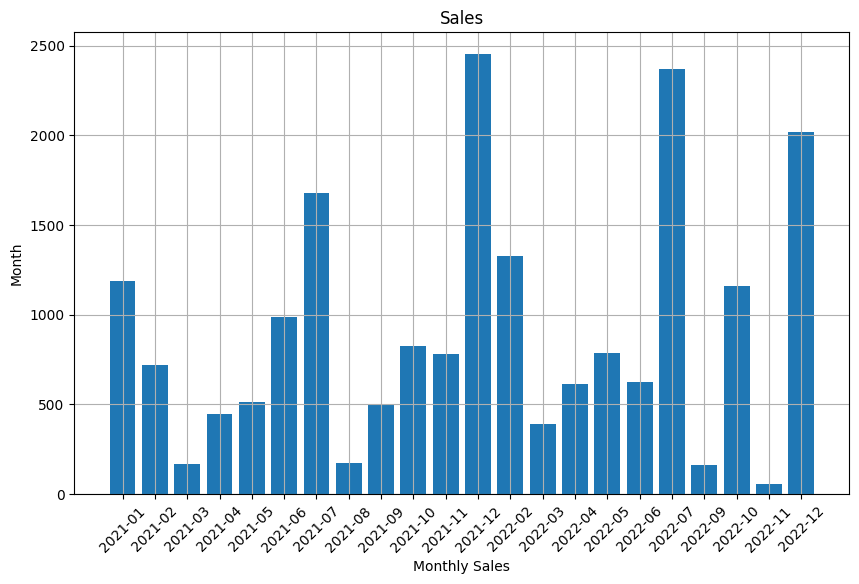

    OrderDate   Region     Rep     Item  Units  Unit Cost    Total
14 2021-09-01  Central   Smith     Desk      2     125.00   250.00
15 2021-09-01  Central   Smith     Desk      2     125.00   250.00
21 2021-12-29     East  Parent  Pen Set     74      15.99  1183.26
22 2021-12-29     East  Parent  Pen Set     74      15.99  1183.26
33 2022-07-21  Central  Morgan  Pen Set     55      12.49   686.95
34 2022-07-21  Central  Morgan  Pen Set     55      12.49   686.95
35 2022-07-21  Central  Morgan  Pen Set     55      12.49   686.95


In [33]:
# Interpret data, appropriate title, appropriate chart
# Display the DataFame of those items with the same date of sell, according to its representative

df['OrderDate'] = pd.to_datetime(df['OrderDate'])

monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Total'].sum()
monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Monthly Sales')
plt.ylabel('Month')
plt.title('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

duplicate_sales = df.groupby(['OrderDate', 'Region', 'Rep', 'Total']).filter(lambda x: len(x)>1)
print(duplicate_sales)

# **Descriptive Analysis**

Sales Performance Analysis
The bar chart visually represents monthly sales data from January 2021 through December 2022. The vertical axis shows the total sales, and the horizontal axis displays the months in a YYYY-MM format.

Sales Trends: The chart shows significant fluctuations in monthly sales over the two-year period. Sales were  relatively strong in the first half of 2021, with a peak in March 2021 , followed by a decline and then a recovery in the later months.

- November and December 2021 saw a major surge on sales, with December recording the highest sales volume shown in the chart, approaching 2500 units.

Sales on 2022 began at a much lower level than the end of 2021. There were a strong rebound on July 2022, where sales nearly matched the peak from the previous year. The year 2022 concluded with a second-highest peak in December, indicating a strong year-end performance.

Duplicate Sales Data: The analysis also identified some duplicate sales records. The table at the bottom of the image shows five instances where multiple sales records occurred on the same date for the same sales representative and product. For example, on September 1, 2021, the representative "Smith" recorded two identical sales of "Pen Set" to the "Central" region, both with a total cost of $250.00. These duplicates could represent data entry errors or separate transactions for the same item.

In summary, the sales data shows a strong seasonal pattern, with major sales peaks occurring toward the end of both 2021 and 2022. The presence of duplicate records suggests a need to verify data integrity to ensure the accuracy of future analyses.